In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'P_50_T_250',
                          'min_5e-23_max_5e-18_ng_7',
                          'wgt_.9_.5_.4_.4_.3_.5_1',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03a_wn_540_620',
                               'P_50_T_250',
                               'min_5e-23_max_5e-18_ng_7',
                               'wgt_.9_.5_.4_.4_.3_.5_1',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

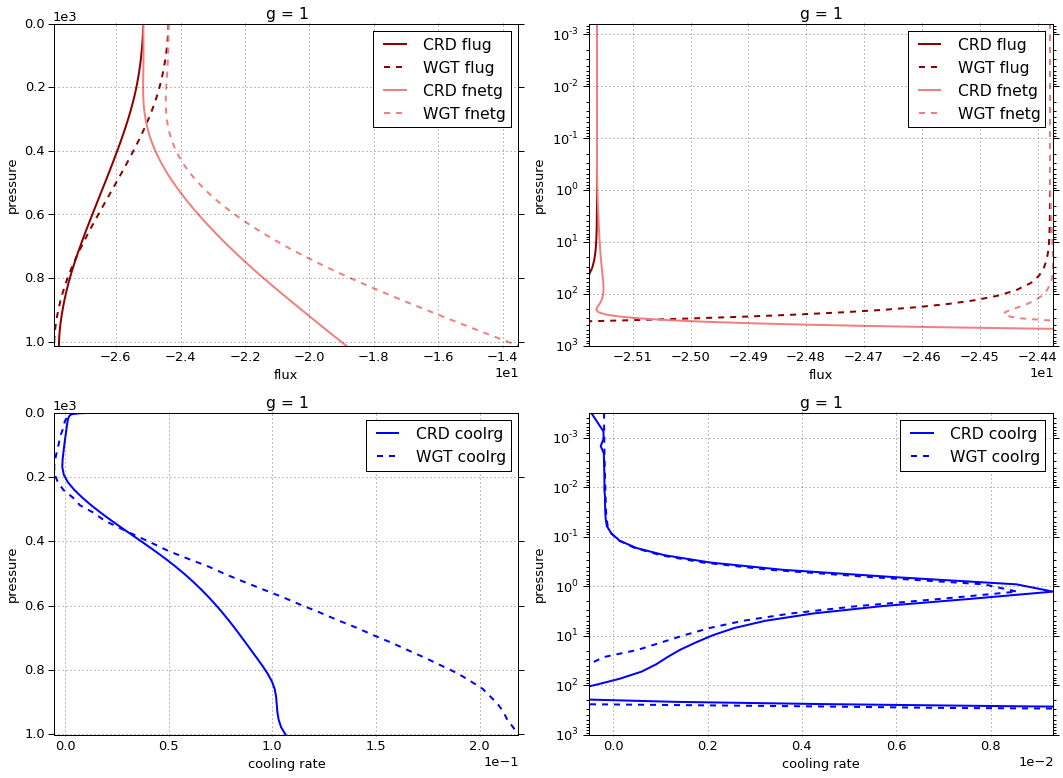

# Figure: flux, cooling rate. g-group 2

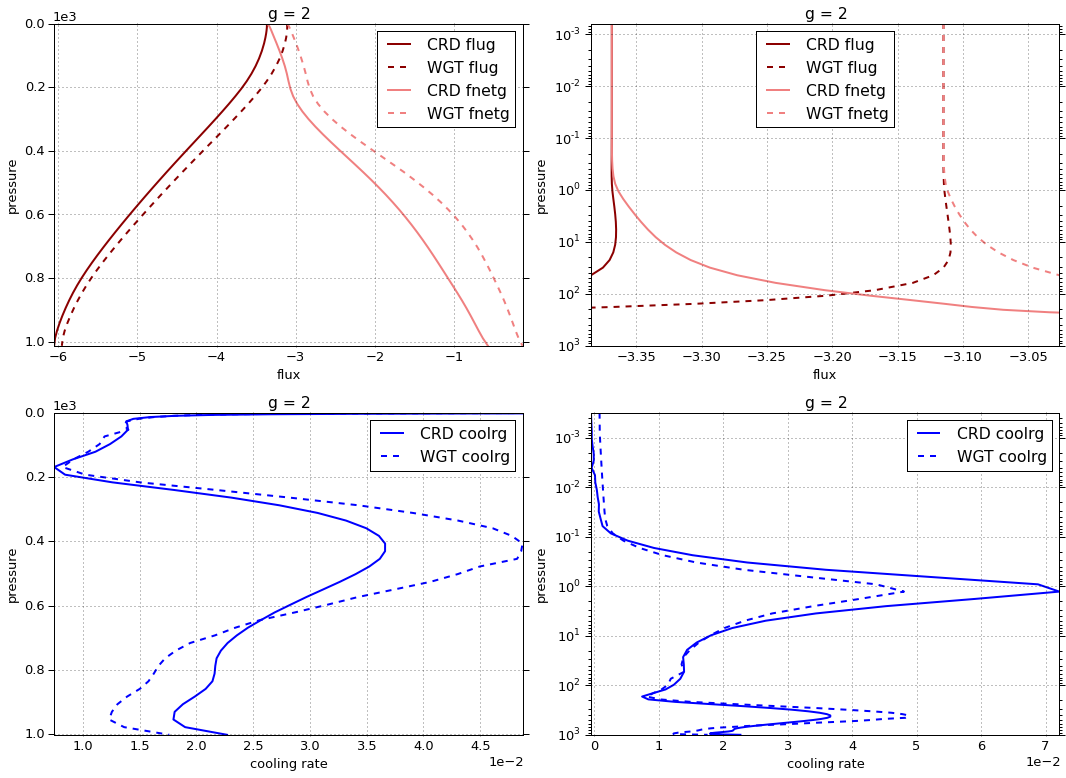

# Figure: flux, cooling rate. g-group 3

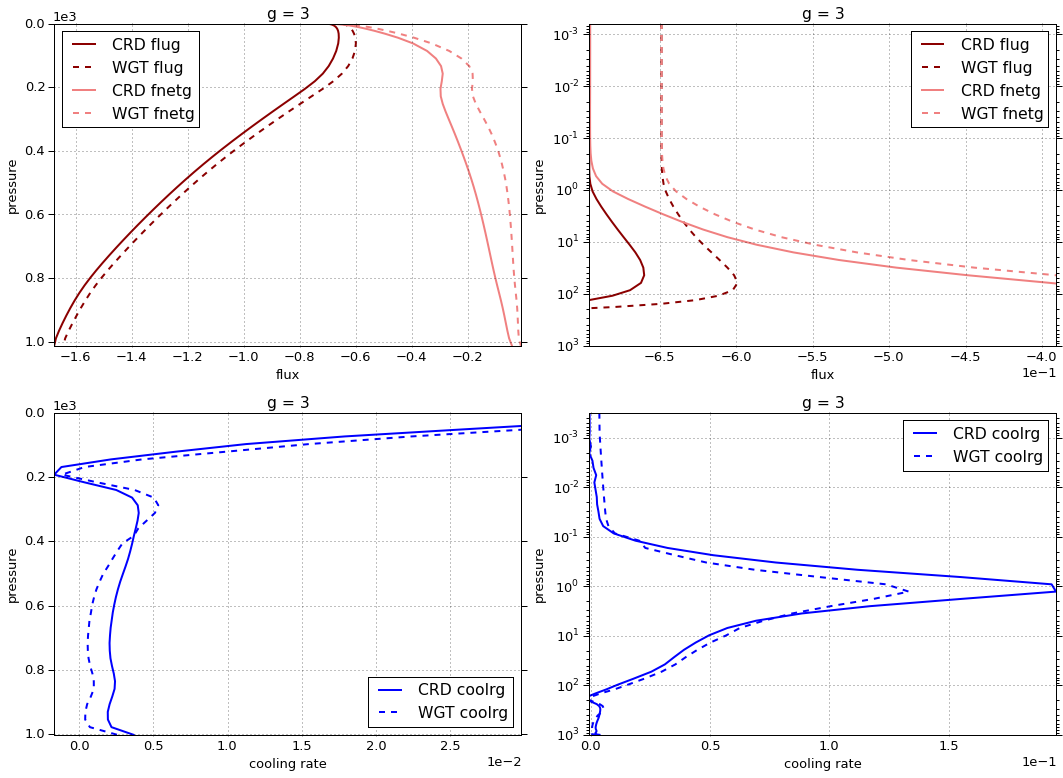

# Figure: flux, cooling rate. g-group 4

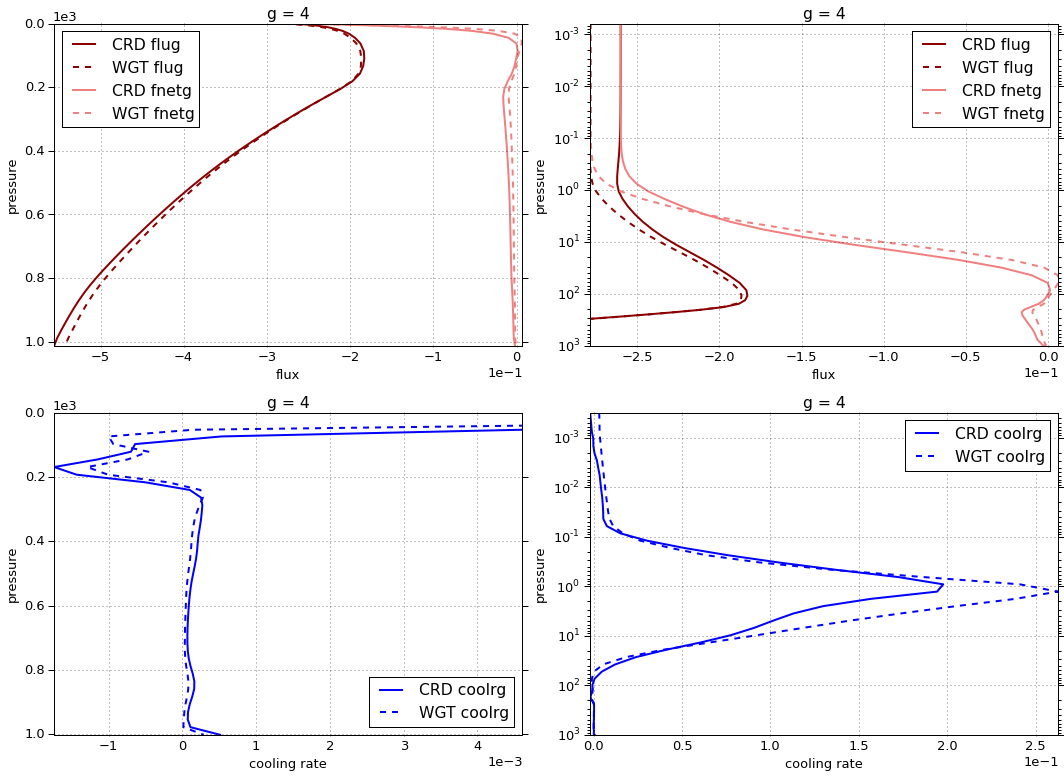

# Figure: flux, cooling rate. g-group 5

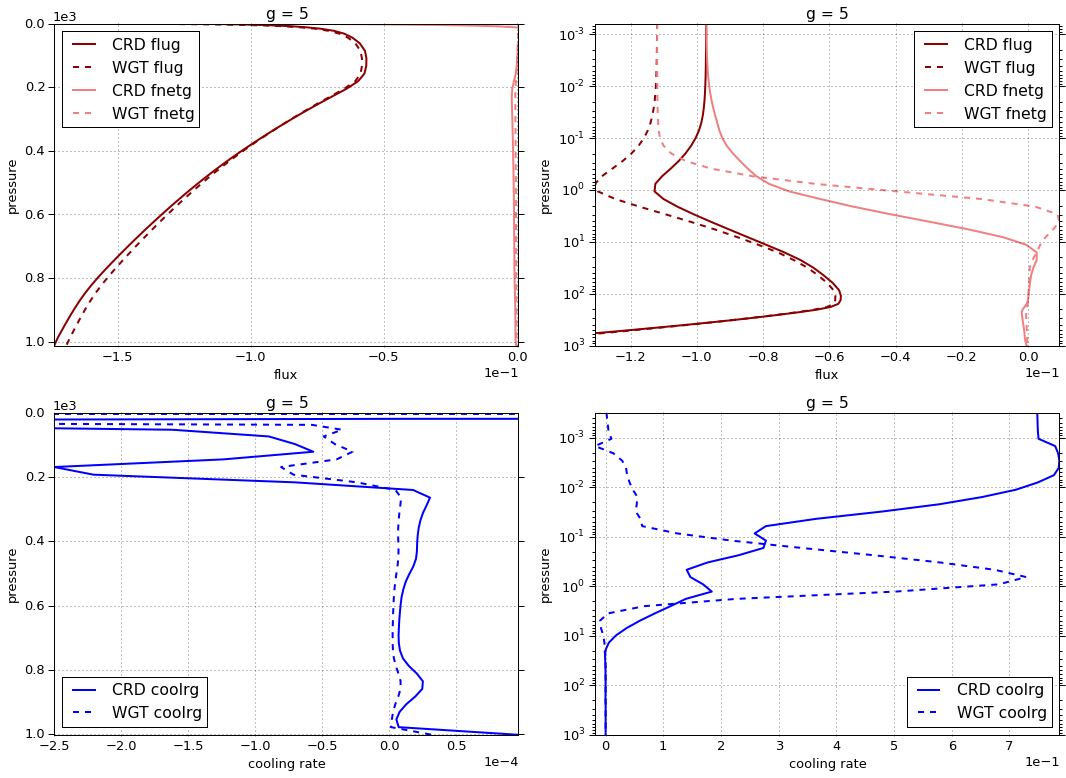

# Figure: flux, cooling rate. g-group 6

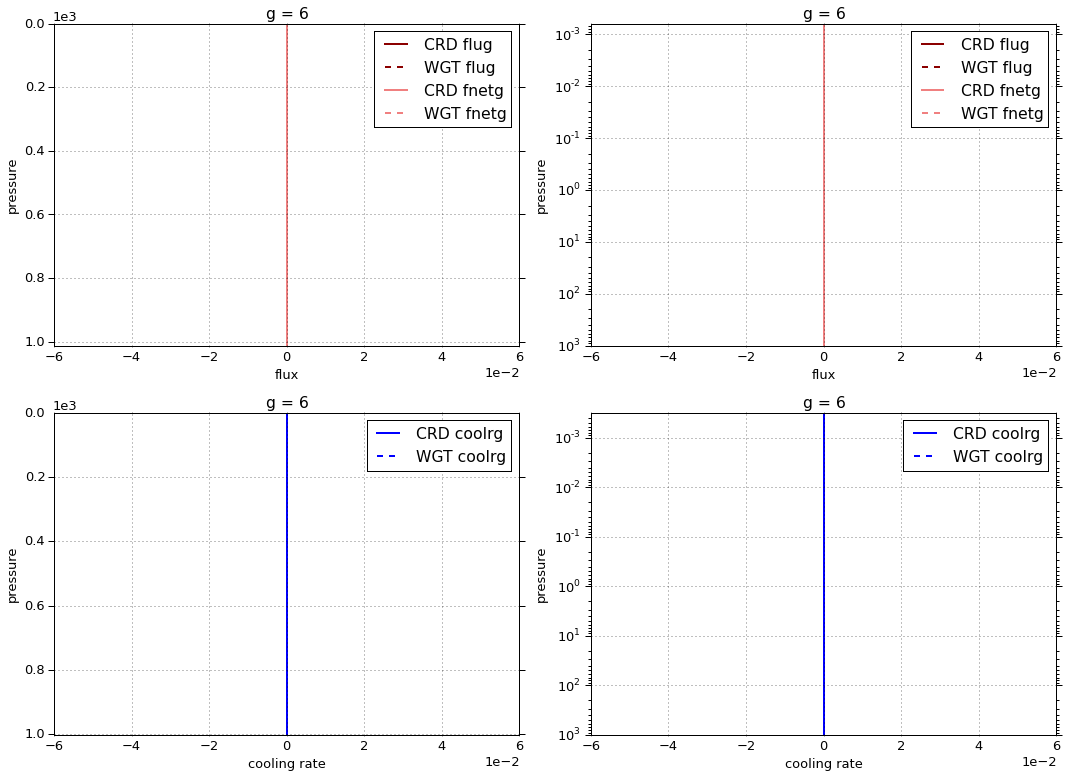

# Figure: flux, cooling rate. g-group 7

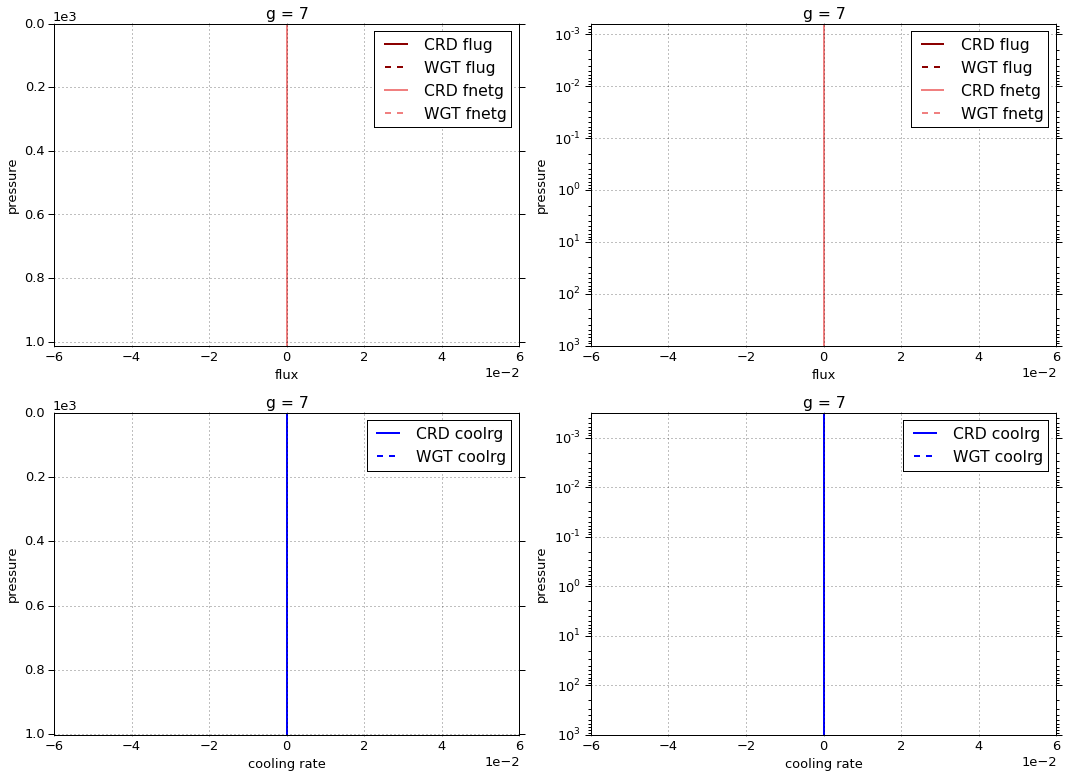

# Figure: flux, cooling rate. g-group total

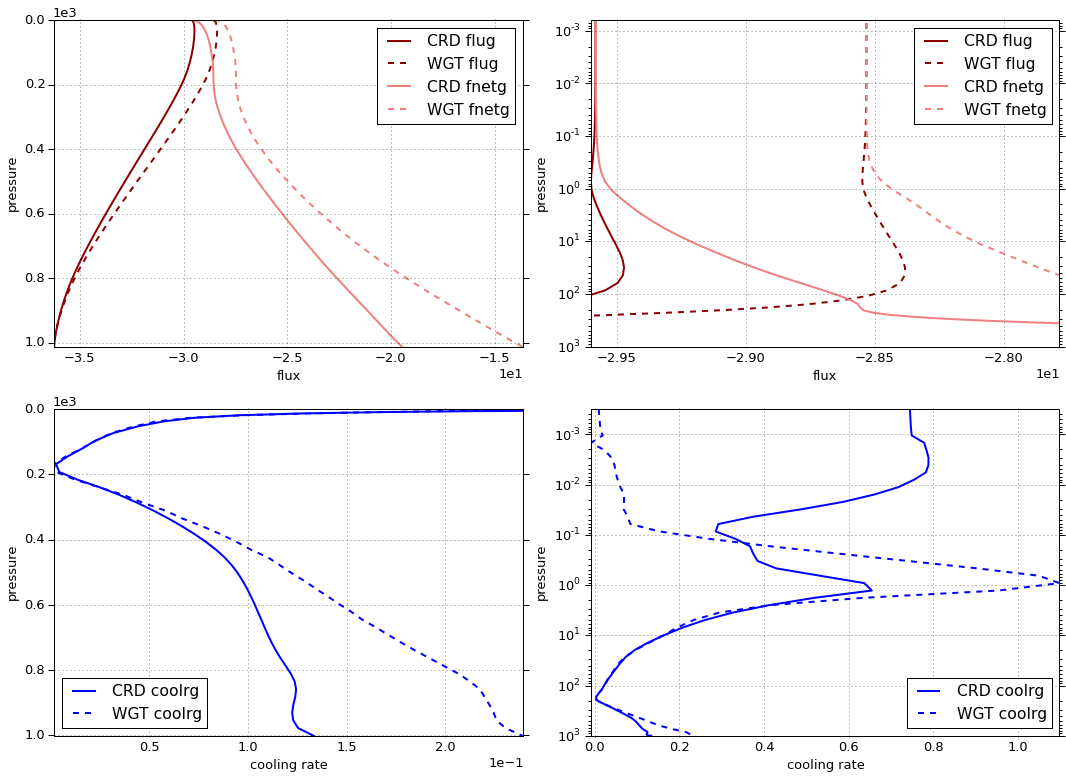

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -25.161647  0.000000 -25.161647
  1013     76    -27.775709  8.922689 -18.853020
2 0        1      -3.368837  0.000000  -3.368837
  1013     76     -6.052099  5.477384  -0.574715
3 0        1      -0.695559  0.000000  -0.695559
  1013     76     -1.678040  1.637050  -0.040989
4 0        1      -0.260110  0.000000  -0.260110
  1013     76     -0.555727  0.553833  -0.001895
5 0        1      -0.097179  0.000000  -0.097179
  1013     76     -0.173845  0.173563  -0.000282
6 0        1       0.000000  0.000000   0.000000
  1013     76      0.000000  0.000000   0.000000
7 0        1       0.000000  0.000000   0.000000
  1013     76      0.000000  0.000000   0.000000


WGT


flug       fldg      fnetg
g pressure level                                 
1 0        1     -24.378618   0.000000 -24.378618
  1013     76    -27.923401  14.408518 -13.514883
2 0        1      -3.114955   0.000000  -3.114955
  1013     76     -5.954731   5.817063  -0.137668
3 0        1      -0.648876   0.000000  -0.648876
  1013     76     -1.645388   1.636178  -0.009209
4 0        1      -0.278467   0.000000  -0.278467
  1013     76     -0.542569   0.541766  -0.000803
5 0        1      -0.111996   0.000000  -0.111996
  1013     76     -0.169330   0.169242  -0.000089
6 0        1       0.000000   0.000000   0.000000
  1013     76      0.000000   0.000000   0.000000
7 0        1       0.000000   0.000000   0.000000
  1013     76      0.000000   0.000000   0.000000


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.783029  0.000000  0.783029
  1013     76    -0.147692  5.485829  5.338137
2 0        1      0.253882  0.000000  0.253882
  1013     76     0.097367  0.339679  0.437046
3 0        1      0.046682  0.000000  0.046682
  1013     76     0.032652 -0.000872  0.031780
4 0        1     -0.018357  0.000000 -0.018357
  1013     76     0.013159 -0.012067  0.001092
5 0        1     -0.014816  0.000000 -0.014816
  1013     76     0.004514 -0.004321  0.000193
6 0        1      0.000000  0.000000  0.000000
  1013     76     0.000000  0.000000  0.000000
7 0        1      0.000000  0.000000  0.000000
  1013     76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000466
  1001.112500 75     0.106369
2 0.000312    1     -0.000477
  1001.112500 75     0.022697
3 0.000312    1     -0.000487
  1001.112500 75     0.003668
4 0.000312    1     -0.001950
  1001.112500 75     0.000512
5 0.000312    1      0.748178
  1001.112500 75     0.000096
6 0.000312    1      0.000000
  1001.112500 75     0.000000
7 0.000312    1      0.000000
  1001.112500 75     0.000000


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000191
  1001.112500 75     0.218629
2 0.000312    1      0.000858
  1001.112500 75     0.017609
3 0.000312    1      0.003607
  1001.112500 75     0.002573
4 0.000312    1      0.003184
  1001.112500 75     0.000289
5 0.000312    1      0.001496
  1001.112500 75     0.000032
6 0.000312    1      0.000000
  1001.112500 75     0.000000
7 0.000312    1      0.000000
  1001.112500 75     0.000000


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000275
  1001.112500 75     0.112259
2 0.000312    1      0.001334
  1001.112500 75    -0.005089
3 0.000312    1      0.004093
  1001.112500 75    -0.001095
4 0.000312    1      0.005134
  1001.112500 75    -0.000223
5 0.000312    1     -0.746681
  1001.112500 75    -0.000064
6 0.000312    1      0.000000
  1001.112500 75     0.000000
7 0.000312    1      0.000000
  1001.112500 75     0.000000

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.583332,0.000000,-29.583332
1013,76,-36.235419,16.764519,-19.470901



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-28.532912,0.000000,-28.532912
1013,76,-36.235419,22.572767,-13.662652



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.050420e+00,0.000000,1.050420
1013,76,1.999999e-08,5.808249,5.808249


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.744798
1001.112500,75,0.133343



WGT


,,coolrg
pressure,layer,
0.000312,1,0.008953
1001.112500,75,0.239131



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.735845
1001.112500,75,0.105789


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.766250,0.770611
2,0.167187,0.164335
3,0.046375,0.045408
4,0.015375,0.014973
5,0.004812,0.004673
6,0.000000,0.000000
7,0.000000,0.000000


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -25.161647  0.000000e+00 -25.161647   1     1   
0.000624      1     2 -25.161647  2.475551e-08 -25.161647   1     2   
0.000876      1     3 -25.161647  3.488204e-08 -25.161647   1     3   
0.001229      1     4 -25.161647  4.948141e-08 -25.161647   1     4   
0.001723      1     5 -25.161647  7.061385e-08 -25.161647   1     5   
0.002417      1     6 -25.161647  1.012022e-07 -25.161647   1     6   
0.003391      1     7 -25.161647  1.454832e-07 -25.161647   1     7   
0.004757      1     8 -25.161647  2.095901e-07 -25.161647   1     8   
0.006672      1     9 -25.161647  3.023986e-07 -25.161647   1     9   
0.009359      1    10 -25.161648  4.367749e-07 -25.161647   1    10   
0.013128      1    11 -25.161648  6.313602e-07 -25.161647   1    11   
0.018415      1    12 -25.161648  9.131908e-07 -25.161647   1    12   
0.025830      1    13 -25.161649  1.321501e-06 -25.161647   1    13   
0.036232      1    14 -25.161650  1.913388e-06 -25.161648   1    14   
0.050823      1    15 -25.161651  2.777131e-06 -25.161648   1    15   
0.071291      1    16 -25.161652  4.123737e-06 -25.161648   1    16   
0.100000      1    17 -25.161655  6.563722e-06 -25.161648   1    17   
0.140271      1    18 -25.161659  1.146782e-05 -25.161648   1    18   
0.196760      1    19 -25.161666  2.147488e-05 -25.161644   1    19   
0.275997      1    20 -25.161676  4.191276e-05 -25.161634   1    20   
0.387100      1    21 -25.161691  8.363141e-05 -25.161607   1    21   
0.543100      1    22 -25.161710  1.688040e-04 -25.161541   1    22   
0.761700      1    23 -25.161728  3.411330e-04 -25.161387   1    23   
1.068500      1    24 -25.161740  6.633317e-04 -25.161077   1    24   
1.498800      1    25 -25.161746  1.143792e-03 -25.160602   1    25   
2.102400      1    26 -25.161777  1.716242e-03 -25.160061   1    26   
2.949000      1    27 -25.161857  2.366181e-03 -25.159490   1    27   
4.136600      1    28 -25.162008  3.114335e-03 -25.158893   1    28   
5.802500      1    29 -25.162262  4.006233e-03 -25.158255   1    29   
8.139200      1    30 -25.162677  5.131951e-03 -25.157545   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -25.700858  6.618444e-01 -25.039013   1    47   
347.300000    1    48 -25.779340  8.032090e-01 -24.976131   1    48   
371.075000    1    49 -25.861375  9.628422e-01 -24.898533   1    49   
394.850000    1    50 -25.946416  1.140528e+00 -24.805887   1    50   
418.625000    1    51 -26.033916  1.335693e+00 -24.698223   1    51   
442.400000    1    52 -26.123388  1.547556e+00 -24.575832   1    52   
466.175000    1    53 -26.214397  1.775088e+00 -24.439309   1    53   
489.950000    1    54 -26.306564  2.017119e+00 -24.289445   1    54   
513.725000    1    55 -26.399542  2.272426e+00 -24.127116   1    55   
537.500000    1    56 -26.492991  2.539779e+00 -23.953212   1    56   
561.275000    1    57 -26.586556  2.818099e+00 -23.768456   1    57   
585.050000    1    58 -26.679873  3.106314e+00 -23.573559   1    58   
608.825000    1    59 -26.772550  3.403426e+00 -23.369124   1    59   
632.600000    1    60 -26.864186  3.708447e+00 -23.155739   1    60   
656.375000    1    61 -26.954333  4.020461e+00 -22.933873   1    61   
680.150000    1    62 -27.042514  4.338683e+00 -22.703831   1    62   
703.925000    1    63 -27.128203  4.662188e+00 -22.466016   1    63   
727.700000    1    64 -27.210824  4.990300e+00 -22.220524   1    64   
751.475000    1    65 -27.289723  5.322271e+00 -21.967451   1    65   
775.250000    1    66 -27.364200  5.657423e+00 -21.706777   1    66   
799.025000    1    67 -27.433533  5.994921e+00 -21.438611   1    67   
822.800000    1    68 -27.497119  6.333561e+00 -21.163558   1    68   
846.575000    1    69 -27.554643  6.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -3.368837  0.000000e+00 -3.368837   2     1 -3.114955   
0.000624      2     2 -3.368837  2.924192e-07 -3.368837   2     2 -3.114955   
0.000876      2     3 -3.368837  4.117699e-07 -3.368837   2     3 -3.114955   
0.001229      2     4 -3.368837  5.830244e-07 -3.368837   2     4 -3.114955   
0.001723      2     5 -3.368838  8.296794e-07 -3.368837   2     5 -3.114955   
0.002417      2     6 -3.368838  1.184915e-06 -3.368837   2     6 -3.114955   
0.003391      2     7 -3.368839  1.696574e-06 -3.368837   2     7 -3.114955   
0.004757      2     8 -3.368839  2.433542e-06 -3.368837   2     8 -3.114955   
0.006672      2     9 -3.368840  3.494945e-06 -3.368837   2     9 -3.114956   
0.009359      2    10 -3.368842  5.023636e-06 -3.368837   2    10 -3.114956   
0.013128      2    11 -3.368844  7.225296e-06 -3.368837   2    11 -3.114956   
0.018415      2    12 -3.368847  1.039623e-05 -3.368836   2    12 -3.114957   
0.025830      2    13 -3.368850  1.496322e-05 -3.368836   2    13 -3.114958   
0.036232      2    14 -3.368856  2.154213e-05 -3.368835   2    14 -3.114960   
0.050823      2    15 -3.368864  3.107547e-05 -3.368833   2    15 -3.114961   
0.071291      2    16 -3.368875  4.567648e-05 -3.368830   2    16 -3.114964   
0.100000      2    17 -3.368892  7.098706e-05 -3.368821   2    17 -3.114967   
0.140271      2    18 -3.368915  1.188042e-04 -3.368796   2    18 -3.114970   
0.196760      2    19 -3.368944  2.103151e-04 -3.368734   2    19 -3.114969   
0.275997      2    20 -3.368976  3.853256e-04 -3.368590   2    20 -3.114960   
0.387100      2    21 -3.368997  7.191055e-04 -3.368278   2    21 -3.114926   
0.543100      2    22 -3.368967  1.353609e-03 -3.367614   2    22 -3.114833   
0.761700      2    23 -3.368802  2.543337e-03 -3.366258   2    23 -3.114613   
1.068500      2    24 -3.368374  4.617257e-03 -3.363757   2    24 -3.114182   
1.498800      2    25 -3.367666  7.586442e-03 -3.360080   2    25 -3.113469   
2.102400      2    26 -3.366916  1.106494e-02 -3.355851   2    26 -3.112684   
2.949000      2    27 -3.366258  1.494604e-02 -3.351312   2    27 -3.111858   
4.136600      2    28 -3.365771  1.929897e-02 -3.346472   2    28 -3.111085   
5.802500      2    29 -3.365536  2.431638e-02 -3.341220   2    29 -3.110324   
8.139200      2    30 -3.365650  3.036768e-02 -3.335282   2    30 -3.109683   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.101443  1.346775e+00 -2.754668   2    47 -3.871584   
347.300000    2    48 -4.189767  1.528586e+00 -2.661180   2    48 -3.964843   
371.075000    2    49 -4.278582  1.715901e+00 -2.562681   2    49 -4.058765   
394.850000    2    50 -4.367407  1.906376e+00 -2.461031   2    50 -4.152737   
418.625000    2    51 -4.455761  2.097906e+00 -2.357855   2    51 -4.246191   
442.400000    2    52 -4.543324  2.288637e+00 -2.254688   2    52 -4.338874   
466.175000    2    53 -4.629891  2.477067e+00 -2.152824   2    53 -4.430839   
489.950000    2    54 -4.715387  2.661823e+00 -2.053564   2    54 -4.521848   
513.725000    2    55 -4.799835  2.842112e+00 -1.957723   2    55 -4.611470   
537.500000    2    56 -4.883222  3.017453e+00 -1.865768   2    56 -4.700653   
561.275000    2    57 -4.965561  3.187582e+00 -1.777979   2    57 -4.788305   
585.050000    2    58 -5.046791  3.352411e+00 -1.694380   2    58 -4.875241   
608.825000    2    59 -5.126843  3.512120e+00 -1.614723   2    59 -4.960798   
632.600000    2    60 -5.205624  3.666666e+00 -1.538958   2    60 -5.045322   
656.375000    2    61 -5.283012  3.816418e+00 -1.466594   2    61 -5.128500   
680.150000    2    62 -5.358854  3.961369e+00 -1.397485   2    62 -5.210034   
703.925000    2    63 -5.432928  4.101815e+00 -1.331113   2   

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      3     1 -0.695559  0.000000 -0.695559   3     1 -0.648876   
0.000624      3     2 -0.695560  0.000001 -0.695559   3     2 -0.648876   
0.000876      3     3 -0.695560  0.000001 -0.695559   3     3 -0.648876   
0.001229      3     4 -0.695561  0.000002 -0.695559   3     4 -0.648877   
0.001723      3     5 -0.695562  0.000003 -0.695559   3     5 -0.648877   
0.002417      3     6 -0.695563  0.000004 -0.695559   3     6 -0.648877   
0.003391      3     7 -0.695565  0.000006 -0.695559   3     7 -0.648877   
0.004757      3     8 -0.695567  0.000008 -0.695558   3     8 -0.648877   
0.006672      3     9 -0.695570  0.000012 -0.695558   3     9 -0.648878   
0.009359      3    10 -0.695575  0.000018 -0.695557   3    10 -0.648878   
0.013128      3    11 -0.695582  0.000025 -0.695557   3    11 -0.648879   
0.018415      3    12 -0.695591  0.000036 -0.695555   3    12 -0.648880   
0.025830      3    13 -0.695605  0.000052 -0.695553   3    13 -0.648882   
0.036232      3    14 -0.695624  0.000075 -0.695549   3    14 -0.648883   
0.050823      3    15 -0.695651  0.000108 -0.695542   3    15 -0.648886   
0.071291      3    16 -0.695689  0.000159 -0.695530   3    16 -0.648889   
0.100000      3    17 -0.695744  0.000247 -0.695497   3    17 -0.648892   
0.140271      3    18 -0.695820  0.000413 -0.695408   3    18 -0.648864   
0.196760      3    19 -0.695918  0.000726 -0.695192   3    19 -0.648845   
0.275997      3    20 -0.696021  0.001311 -0.694710   3    20 -0.648769   
0.387100      3    21 -0.696079  0.002390 -0.693689   3    21 -0.648617   
0.543100      3    22 -0.695968  0.004344 -0.691624   3    22 -0.648267   
0.761700      3    23 -0.695393  0.007784 -0.687609   3    23 -0.647511   
1.068500      3    24 -0.693922  0.013334 -0.680589   3    24 -0.646059   
1.498800      3    25 -0.691356  0.020707 -0.670649   3    25 -0.643816   
2.102400      3    26 -0.688242  0.028712 -0.659530   3    26 -0.641078   
2.949000      3    27 -0.684828  0.037043 -0.647785   3    27 -0.637939   
4.136600      3    28 -0.681229  0.045897 -0.635332   3    28 -0.634471   
5.802500      3    29 -0.677495  0.055839 -0.621656   3    29 -0.630644   
8.139200      3    30 -0.673629  0.067822 -0.605807   3    30 -0.626299   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    3    47 -0.971162  0.715079 -0.256083   3    47 -0.917173   
347.300000    3    48 -1.007674  0.762680 -0.244993   3    48 -0.955191   
371.075000    3    49 -1.043414  0.809176 -0.234238   3    49 -0.992368   
394.850000    3    50 -1.078300  0.854455 -0.223845   3    50 -1.028441   
418.625000    3    51 -1.112238  0.898459 -0.213779   3    51 -1.063442   
442.400000    3    52 -1.145158  0.941081 -0.204077   3    52 -1.097231   
466.175000    3    53 -1.177055  0.982272 -0.194783   3    53 -1.129882   
489.950000    3    54 -1.207995  1.022022 -0.185973   3    54 -1.161442   
513.725000    3    55 -1.238079  1.060401 -0.177677   3    55 -1.192086   
537.500000    3    56 -1.267410  1.097529 -0.169881   3    56 -1.221874   
561.275000    3    57 -1.296067  1.133548 -0.162519   3    57 -1.250951   
585.050000    3    58 -1.324099  1.168566 -0.155534   3    58 -1.279358   
608.825000    3    59 -1.351539  1.202676 -0.148864   3    59 -1.307176   
632.600000    3    60 -1.378408  1.235941 -0.142467   3    60 -1.334405   
656.375000    3    61 -1.404716  1.268444 -0.136272   3    61 -1.361106   
680.150000    3    62 -1.430463  1.300184 -0.130279   3    62 -1.387276   
703.925000    3    63 -1.455632  1.331220 -0.124412   3    63 -1.412905   
727.700000    3    64 -1.480185  1.361556 -0.118629   3    64 -1.438001   
751.475000    3    65 -1.504032  1.391223 -0.112808   3    65 -1.462457   
775.250000    3    66 -1.527014  1.42

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      4     1 -0.260110  0.000000 -0.260110   4     1 -0.278467   
0.000624      4     2 -0.260113  0.000003 -0.260110   4     2 -0.278468   
0.000876      4     3 -0.260114  0.000004 -0.260110   4     3 -0.278468   
0.001229      4     4 -0.260116  0.000005 -0.260110   4     4 -0.278468   
0.001723      4     5 -0.260118  0.000008 -0.260110   4     5 -0.278469   
0.002417      4     6 -0.260121  0.000011 -0.260110   4     6 -0.278470   
0.003391      4     7 -0.260126  0.000016 -0.260110   4     7 -0.278471   
0.004757      4     8 -0.260132  0.000022 -0.260110   4     8 -0.278473   
0.006672      4     9 -0.260141  0.000032 -0.260109   4     9 -0.278476   
0.009359      4    10 -0.260153  0.000046 -0.260108   4    10 -0.278480   
0.013128      4    11 -0.260171  0.000066 -0.260106   4    11 -0.278486   
0.018415      4    12 -0.260196  0.000094 -0.260103   4    12 -0.278493   
0.025830      4    13 -0.260232  0.000134 -0.260098   4    13 -0.278504   
0.036232      4    14 -0.260282  0.000191 -0.260091   4    14 -0.278519   
0.050823      4    15 -0.260354  0.000272 -0.260082   4    15 -0.278540   
0.071291      4    16 -0.260456  0.000392 -0.260064   4    16 -0.278569   
0.100000      4    17 -0.260605  0.000593 -0.260012   4    17 -0.278608   
0.140271      4    18 -0.260818  0.000950 -0.259868   4    18 -0.278659   
0.196760      4    19 -0.261107  0.001581 -0.259526   4    19 -0.278698   
0.275997      4    20 -0.261480  0.002666 -0.258813   4    20 -0.278711   
0.387100      4    21 -0.261907  0.004473 -0.257434   4    21 -0.278608   
0.543100      4    22 -0.262278  0.007375 -0.254904   4    22 -0.278220   
0.761700      4    23 -0.262276  0.011832 -0.250444   4    23 -0.277228   
1.068500      4    24 -0.261340  0.018081 -0.243259   4    24 -0.275091   
1.498800      4    25 -0.258958  0.025601 -0.233357   4    25 -0.271534   
2.102400      4    26 -0.255627  0.033474 -0.222153   4    26 -0.267038   
2.949000      4    27 -0.251496  0.042358 -0.209138   4    27 -0.261766   
4.136600      4    28 -0.246579  0.053347 -0.193232   4    28 -0.255749   
5.802500      4    29 -0.240813  0.067600 -0.173213   4    29 -0.248990   
8.139200      4    30 -0.234098  0.085951 -0.148147   4    30 -0.241401   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    4    47 -0.290015  0.276490 -0.013525   4    47 -0.288536   
347.300000    4    48 -0.304301  0.291482 -0.012819   4    48 -0.302373   
371.075000    4    49 -0.318145  0.305987 -0.012158   4    49 -0.315733   
394.850000    4    50 -0.331534  0.319988 -0.011546   4    50 -0.328630   
418.625000    4    51 -0.344450  0.333489 -0.010961   4    51 -0.341047   
442.400000    4    52 -0.356875  0.346475 -0.010401   4    52 -0.352975   
466.175000    4    53 -0.368815  0.358936 -0.009878   4    53 -0.364411   
489.950000    4    54 -0.380301  0.370892 -0.009409   4    54 -0.375394   
513.725000    4    55 -0.391393  0.382392 -0.009001   4    55 -0.385975   
537.500000    4    56 -0.402148  0.393499 -0.008649   4    56 -0.396221   
561.275000    4    57 -0.412614  0.404273 -0.008341   4    57 -0.406174   
585.050000    4    58 -0.422822  0.414755 -0.008067   4    58 -0.415868   
608.825000    4    59 -0.432794  0.424977 -0.007818   4    59 -0.425328   
632.600000    4    60 -0.442549  0.434959 -0.007589   4    60 -0.434574   
656.375000    4    61 -0.452098  0.444721 -0.007377   4    61 -0.443615   
680.150000    4    62 -0.461453  0.454274 -0.007179   4    62 -0.452468   
703.925000    4    63 -0.470616  0.463630 -0.006986   4    63 -0.461134   
727.700000    4    64 -0.479587  0.472794 -0.006793   4    64 -0.469622   
751.475000    4    65 -0.488349  0.481763 -0.006586   4    65 -0.477917   
775.250000    4    66 -0.496856  0.49

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.097179  0.000000 -0.097179   5     1 -0.111996   
0.000624      5     2 -0.097199  0.000075 -0.097124   5     2 -0.112019   
0.000876      5     3 -0.097207  0.000106 -0.097102   5     3 -0.112029   
0.001229      5     4 -0.097219  0.000148 -0.097070   5     4 -0.112042   
0.001723      5     5 -0.097234  0.000209 -0.097025   5     5 -0.112063   
0.002417      5     6 -0.097254  0.000294 -0.096960   5     6 -0.112090   
0.003391      5     7 -0.097282  0.000413 -0.096870   5     7 -0.112127   
0.004757      5     8 -0.097321  0.000578 -0.096742   5     8 -0.112179   
0.006672      5     9 -0.097373  0.000807 -0.096566   5     9 -0.112253   
0.009359      5    10 -0.097446  0.001118 -0.096328   5    10 -0.112357   
0.013128      5    11 -0.097547  0.001537 -0.096010   5    11 -0.112504   
0.018415      5    12 -0.097690  0.002089 -0.095601   5    12 -0.112707   
0.025830      5    13 -0.097895  0.002801 -0.095093   5    13 -0.112998   
0.036232      5    14 -0.098198  0.003695 -0.094503   5    14 -0.113409   
0.050823      5    15 -0.098663  0.004790 -0.093873   5    15 -0.113986   
0.071291      5    16 -0.099366  0.006167 -0.093199   5    16 -0.114807   
0.100000      5    17 -0.100378  0.008057 -0.092320   5    17 -0.115973   
0.140271      5    18 -0.101723  0.010728 -0.090994   5    18 -0.117576   
0.196760      5    19 -0.103405  0.014241 -0.089163   5    19 -0.119680   
0.275997      5    20 -0.105452  0.018454 -0.086998   5    20 -0.122348   
0.387100      5    21 -0.107865  0.023191 -0.084675   5    21 -0.125466   
0.543100      5    22 -0.110476  0.028400 -0.082077   5    22 -0.128637   
0.761700      5    23 -0.112525  0.034253 -0.078272   5    23 -0.130718   
1.068500      5    24 -0.112797  0.040664 -0.072132   5    24 -0.129899   
1.498800      5    25 -0.110071  0.047318 -0.062753   5    25 -0.124616   
2.102400      5    26 -0.105888  0.053075 -0.052812   5    26 -0.117367   
2.949000      5    27 -0.100984  0.059458 -0.041526   5    27 -0.109539   
4.136600      5    28 -0.095691  0.066143 -0.029548   5    28 -0.101805   
5.802500      5    29 -0.090208  0.072380 -0.017827   5    29 -0.094505   
8.139200      5    30 -0.084670  0.076992 -0.007678   5    30 -0.087776   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.089269  0.087606 -0.001663   5    47 -0.089282   
347.300000    5    48 -0.093830  0.092232 -0.001598   5    48 -0.093656   
371.075000    5    49 -0.098239  0.096703 -0.001536   5    49 -0.097877   
394.850000    5    50 -0.102501  0.101025 -0.001476   5    50 -0.101948   
418.625000    5    51 -0.106610  0.105193 -0.001417   5    51 -0.105866   
442.400000    5    52 -0.110561  0.109202 -0.001359   5    52 -0.109627   
466.175000    5    53 -0.114352  0.113049 -0.001303   5    53 -0.113231   
489.950000    5    54 -0.117996  0.116744 -0.001252   5    54 -0.116687   
513.725000    5    55 -0.121510  0.120300 -0.001210   5    55 -0.120014   
537.500000    5    56 -0.124916  0.123740 -0.001175   5    56 -0.123232   
561.275000    5    57 -0.128227  0.127081 -0.001146   5    57 -0.126357   
585.050000    5    58 -0.131455  0.130335 -0.001120   5    58 -0.129399   
608.825000    5    59 -0.134608  0.133512 -0.001096   5    59 -0.132367   
632.600000    5    60 -0.137691  0.136617 -0.001073   5    60 -0.135267   
656.375000    5    61 -0.140708  0.139656 -0.001052   5    61 -0.138102   
680.150000    5    62 -0.143664  0.142632 -0.001032   5    62 -0.140876   
703.925000    5    63 -0.146560  0.145548 -0.001012   5    63 -0.143592   
727.700000    5    64 -0.149397  0.148405 -0.000992   5    64 -0.146252   
751.475000    5    65 -0.152171  0.151202 -0.000969   5    65 -0.148852   
775.250000    5    66 -0.154871  0.15

In [21]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                       wgt                      
              g level flug fldg fnetg   g level flug fldg fnetg
pressure                                                       
0.000000      6     1    0    0     0   6     1    0    0     0
0.000624      6     2    0    0     0   6     2    0    0     0
0.000876      6     3    0    0     0   6     3    0    0     0
0.001229      6     4    0    0     0   6     4    0    0     0
0.001723      6     5    0    0     0   6     5    0    0     0
0.002417      6     6    0    0     0   6     6    0    0     0
0.003391      6     7    0    0     0   6     7    0    0     0
0.004757      6     8    0    0     0   6     8    0    0     0
0.006672      6     9    0    0     0   6     9    0    0     0
0.009359      6    10    0    0     0   6    10    0    0     0
0.013128      6    11    0    0     0   6    11    0    0     0
0.018415      6    12    0    0     0   6    12    0    0     0
0.025830      6    13    0    0     0   6    13    0    0     0
0.036232      6    14    0    0     0   6    14    0    0     0
0.050823      6    15    0    0     0   6    15    0    0     0
0.071291      6    16    0    0     0   6    16    0    0     0
0.100000      6    17    0    0     0   6    17    0    0     0
0.140271      6    18    0    0     0   6    18    0    0     0
0.196760      6    19    0    0     0   6    19    0    0     0
0.275997      6    20    0    0     0   6    20    0    0     0
0.387100      6    21    0    0     0   6    21    0    0     0
0.543100      6    22    0    0     0   6    22    0    0     0
0.761700      6    23    0    0     0   6    23    0    0     0
1.068500      6    24    0    0     0   6    24    0    0     0
1.498800      6    25    0    0     0   6    25    0    0     0
2.102400      6    26    0    0     0   6    26    0    0     0
2.949000      6    27    0    0     0   6    27    0    0     0
4.136600      6    28    0    0     0   6    28    0    0     0
5.802500      6    29    0    0     0   6    29    0    0     0
8.139200      6    30    0    0     0   6    30    0    0     0
...          ..   ...  ...  ...   ...  ..   ...  ...  ...   ...
323.525000    6    47    0    0     0   6    47    0    0     0
347.300000    6    48    0    0     0   6    48    0    0     0
371.075000    6    49    0    0     0   6    49    0    0     0
394.850000    6    50    0    0     0   6    50    0    0     0
418.625000    6    51    0    0     0   6    51    0    0     0
442.400000    6    52    0    0     0   6    52    0    0     0
466.175000    6    53    0    0     0   6    53    0    0     0
489.950000    6    54    0    0     0   6    54    0    0     0
513.725000    6    55    0    0     0   6    55    0    0     0
537.500000    6    56    0    0     0   6    56    0    0     0
561.275000    6    57    0    0     0   6    57    0    0     0
585.050000    6    58    0    0     0   6    58    0    0     0
608.825000    6    59    0    0     0   6    59    0    0     0
632.600000    6    60    0    0     0   6    60    0    0     0
656.375000    6    61    0    0     0   6    61    0    0     0
680.150000    6    62    0    0     0   6    62    0    0     0
703.925000    6    63    0    0     0   6    63    0    0     0
727.700000    6    64    0    0     0   6    64    0    0     0
751.475000    6    65    0    0     0   6    65    0    0     0
775.250000    6    66    0    0     0   6    66    0    0     0
799.025000    6    67    0    0     0   6    67    0    0     0
822.800000    6    68    0    0     0   6    68    0    0     0
846.575000    6    69    0    0     0   6    69    0    0     0
870.350000    6    70    0    0     0   6    70    0    0     0
894.125000    6    71    0    0     0   6    71    0    0     0
917.900000    6    72    0    0     0   6    72    0    0     0
941.675000    6    73    0    0     0   6    73    0    0     0
965.450000    6    74    0    0     0   6    74    0    0     0
989.225000    6    75    0    0     0   6   

In [22]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                       wgt                      
              g level flug fldg fnetg   g level flug fldg fnetg
pressure                                                       
0.000000      7     1    0    0     0   7     1    0    0     0
0.000624      7     2    0    0     0   7     2    0    0     0
0.000876      7     3    0    0     0   7     3    0    0     0
0.001229      7     4    0    0     0   7     4    0    0     0
0.001723      7     5    0    0     0   7     5    0    0     0
0.002417      7     6    0    0     0   7     6    0    0     0
0.003391      7     7    0    0     0   7     7    0    0     0
0.004757      7     8    0    0     0   7     8    0    0     0
0.006672      7     9    0    0     0   7     9    0    0     0
0.009359      7    10    0    0     0   7    10    0    0     0
0.013128      7    11    0    0     0   7    11    0    0     0
0.018415      7    12    0    0     0   7    12    0    0     0
0.025830      7    13    0    0     0   7    13    0    0     0
0.036232      7    14    0    0     0   7    14    0    0     0
0.050823      7    15    0    0     0   7    15    0    0     0
0.071291      7    16    0    0     0   7    16    0    0     0
0.100000      7    17    0    0     0   7    17    0    0     0
0.140271      7    18    0    0     0   7    18    0    0     0
0.196760      7    19    0    0     0   7    19    0    0     0
0.275997      7    20    0    0     0   7    20    0    0     0
0.387100      7    21    0    0     0   7    21    0    0     0
0.543100      7    22    0    0     0   7    22    0    0     0
0.761700      7    23    0    0     0   7    23    0    0     0
1.068500      7    24    0    0     0   7    24    0    0     0
1.498800      7    25    0    0     0   7    25    0    0     0
2.102400      7    26    0    0     0   7    26    0    0     0
2.949000      7    27    0    0     0   7    27    0    0     0
4.136600      7    28    0    0     0   7    28    0    0     0
5.802500      7    29    0    0     0   7    29    0    0     0
8.139200      7    30    0    0     0   7    30    0    0     0
...          ..   ...  ...  ...   ...  ..   ...  ...  ...   ...
323.525000    7    47    0    0     0   7    47    0    0     0
347.300000    7    48    0    0     0   7    48    0    0     0
371.075000    7    49    0    0     0   7    49    0    0     0
394.850000    7    50    0    0     0   7    50    0    0     0
418.625000    7    51    0    0     0   7    51    0    0     0
442.400000    7    52    0    0     0   7    52    0    0     0
466.175000    7    53    0    0     0   7    53    0    0     0
489.950000    7    54    0    0     0   7    54    0    0     0
513.725000    7    55    0    0     0   7    55    0    0     0
537.500000    7    56    0    0     0   7    56    0    0     0
561.275000    7    57    0    0     0   7    57    0    0     0
585.050000    7    58    0    0     0   7    58    0    0     0
608.825000    7    59    0    0     0   7    59    0    0     0
632.600000    7    60    0    0     0   7    60    0    0     0
656.375000    7    61    0    0     0   7    61    0    0     0
680.150000    7    62    0    0     0   7    62    0    0     0
703.925000    7    63    0    0     0   7    63    0    0     0
727.700000    7    64    0    0     0   7    64    0    0     0
751.475000    7    65    0    0     0   7    65    0    0     0
775.250000    7    66    0    0     0   7    66    0    0     0
799.025000    7    67    0    0     0   7    67    0    0     0
822.800000    7    68    0    0     0   7    68    0    0     0
846.575000    7    69    0    0     0   7    69    0    0     0
870.350000    7    70    0    0     0   7    70    0    0     0
894.125000    7    71    0    0     0   7    71    0    0     0
917.900000    7    72    0    0     0   7    72    0    0     0
941.675000    7    73    0    0     0   7    73    0    0     0
965.450000    7    74    0    0     0   7    74    0    0     0
989.225000    7    75    0    0     0   7   

In [23]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')